[texto do link](https://)# Avaliação 01 - ENGG03

## Questão adaptada de [Galan et al. 2004](https://doi.org/10.1016/j.jprocont.2003.10.003)

Em um reator de neutralização, uma solução ácida (HCl) com vazão volumétrica $F_a = 1$ L/min e concentração inicial $C_{1,\text{in}} = 0.0012$ mol HCl/L é neutralizada por uma solução alcalina (NaOH + NaHCO3) com vazão $F_b = 0.82$ L/min e concentrações iniciais $C_{2,\text{in}} = 0.002$ mol NaOH/L e $C_{3,\text{in}} = 0.0025$ mol NaHCO3/L.
O comportamento dinâmico das concentrações dentro do reator, representado pelas variáveis $x_1$, $x_2$ e $x_3$, pode ser descrito pelo seguinte sistema de equações diferenciais:
\begin{align}
\frac{dx_1}{dt} &= \frac{Fa\cdot(C_{1,\text{in}}-x_1) - Fb\cdot x_1}{V}\\
\frac{dx_2}{dt} &= \frac{Fb\cdot(C_{2,\text{in}}-x_2) - Fa\cdot x_2}{V}\\
\frac{dx_3}{dt} &= \frac{Fb\cdot(C_{3,\text{in}}-x_3) - Fa\cdot x_3}{V}
\end{align}

Além disso, é possível determinar o pH da solução a partir do seguinte sistema de equações algébricas:

\begin{align*}
\text{pH} &= -\log_{10}(\xi) \\
\xi &= x_1 + \frac{K_e}{\xi} + \frac{K_e\cdot x_3}{K_e + K_d\cdot\xi} - x_2 - x_3
\end{align*}
na qual $K_e = 1\times 10^{-4}$ (mol/L)$^2$ e $K_d = 1\times 10^{-7}$ mol/L

A partir das informações dada, pede-se:

1.   No estado estacionário, as concentrações não variam com o tempo. Portanto, calcule os valores das concentrações $x_1$, $x_2$ e $x_3$ e o pH nessas condições.
2.   Assumindo a razão $u = \frac{F_b}{F_a}$, avalie o comportamento do pH para um intervalo de valores de $u$ no intervalo $[0,1]$.

  2.1. Dica: Utilize uma variação mínima de $\Delta u = 0.05$.

  2.2. Dica: Construa um gráfico de pH em função de $u$.

OBS: Comente seu código de maneira clara e objetiva deixando em evidência para que serve/objetivo de cada função, bilbioteca e variáveis utilizadas.

### Questão 1)


---



Assumindo que o sistema encontra-se em estado estacionário, subentende-se que as variáveis do sistema não variam com o tempo. Logo, suas respectivas derivadas equivalem a zero. Visando utilizar a linguagem Python para resolução do sistema de equações diferenciais, serão importadas para o código a biblioteca `numpy` e a função `fsolve`, as quais servem, respectivamente, para armazenar e manipular arrays multidimensionais e aplicar algoritmos de otimização numérica para solucionar equações não-lineares:

In [ ]:
import numpy as np
from scipy.optimize import fsolve

O próximo passo é definir as subrotinas que representarão, programaticamente, as funções que foram dadas no sistema, permitindo assim que o algoritmo possa encontrar as raízes dessas equações.

A começar pela subrotina que retornará as saídas do sistema de equações diferenciais que representam as três concentrações a serem calculadas, chamada aqui de `funcao_concentracoes`. Em relação às variáveis e valores utilizados, considera-se:

*   `X` como sendo uma array com os possíveis valores de concentrações - que serão armazenados nas variáveis locais `x1`, `x2` e `x3` - que servirão como as raízes a configurar as soluções do sistema;
*   `Fa` e `Fb` sendo as vazões de soluções dentro do reator, valores constantes fornecidos pela questão;
*   `c1i`, `c2i` e `c3i` como as concentrações iniciais de, respectivamente, HCl, NaOH e NaHCO3

As três equações que representam o array de EDO's equivalem às expressões para as quais as variações de concentração ao longo do tempo equivalem a 0, permitindo assim encontrar as suas respectivas raízes, que representarão os valores de concentração objetivados.

Dessa forma, têm-se:

In [ ]:
def funcao_concentracoes(X, Fa, Fb):
    x1 = X[0]
    x2 = X[1]
    x3 = X[2]

    c1i = 0.0012
    c2i = 0.0020
    c3i = 0.0025


    edo = np.array([Fa*(c1i - x1) - Fb*x1,
                   Fb*(c2i - x2) - Fa*x2,
                    Fb*(c3i - x3) - Fa*x3])
    return edo

Da mesma forma, foi criada a subrotina `funcao_ph`, cujo objetivo é o cálculo da concentração de íons de hidrogênio da solução. Este valor servirá como entrada na função logarítmica que retornará, de fato, o pH da solução.

Para a resolução dessa etapa, considera-se que os valores de concentração - `x1`, `x2` e `x3` - já foram encontrados e servirão como constantes, assim como `kd` e `ke`, que são, respectivamente, o coeficiente de molaridade e o coeficiente de molaridade ao quadrado.

`Y`, nesse caso, representa a concentração ξ, e está presente como `-Y` ao final da expressão que retorna o valor da função pois, para a resolução do problema, faz-se necessário encontrar o valor mais apropriado de ξ para que toda a expressão seja igual a 0, este sendo a raiz da função:

In [ ]:
def funcao_ph(Y, x1, x2, x3, ke, kd):
    return  ((x1) + (ke/Y) + ((ke*x3)/(ke + (Y * kd))) - (x2) - (x3) - Y)

Passadas as definições de subrotinas que trarão as resoluções almejadas, é declarada a array contendo os possíveis valores iniciais de concentrações das substâncias a compor o sistema. Através de cálculos manuais, estimou-se que as concentrações $x_1$ e $x_3$ teriam valores da ordem de $10^{-3}$, enquanto $x_2$ teria valor da ordem de $10^{-2}$:

In [ ]:
X0 = np.array([0.0005, 0.005, 0.0005])

Seguidamente, foram declarados os valores de vazão fornecidos pela questão, $F_a = 1 L/min$ e $F_b = 0,82 L/min$:

In [ ]:
Fa = 1
Fb = 0.82

Como explicitado no início da resolução da questão, a função `fsolve` será utilizada na resolução das equações, recebendo como argumentos a subrotina que retorna o valor da função em questão, os valores iniciais estipulados e os valores para os argumentos que serão constantes.

De maneira simples e acessível, a função permite a utilização do método algébrico conhecido como escalonamento para calcular os valores que servem como resolução dos sistemas fornecidos na entrada.

Dessa forma, é possível inferir nos valores aproximados das concentrações objetivadas:

In [ ]:
print("----------------------Valores de X1, X2 e X3----------------------")

X = fsolve(funcao_concentracoes, X0, args=(Fa, Fb))
print(f'x1 = {X[0]:.7f}  x2 = {X[1]:.7f}  x3 = {X[2]:.7f} ')

x1 = round(X[0], 7)
x2 = round(X[1], 7)
x3 = round(X[2], 7)

----------------------Valores de X1, X2 e X3----------------------
x1 = 0.0006593  x2 = 0.0009011  x3 = 0.0011264 


Em seguida, foram declarado os valores de molaridade ($K_d$) e molaridade ao quadrado ($K_e$), junto à variável `Y0`, que serve como o valor inicial estipulado para o cálculo do valor aproximado da concentração de íons de hidrogênio da solução. A ordem de grandeza do valor de `Y0` foi definida, assim como on caso das concentrações, a partir de manipulações algébricas manuais, que serão explicitadas posteriormente:

In [ ]:
ke = 1e-14
kd = 1e-7
Y0 = 0.0000000001

Tendo os valores devidamente declarados, é possível usar a `fsolve` para encontrar a resolução da função:

In [ ]:
result = fsolve(funcao_ph, Y0, args=(x1,x2,x3,ke,kd))

A argumentação a respeito do possível valor da concentração de íons de hidrogênio foi feita a partir de manipulações da função de concentração de íons de hidrogênio, com o objetivo de torná-la mais apropriada para resolução manual.

Dessa forma, foi possível identificar que ξ possui o comportamento equivalente a um polinômio de terceiro grau, o que torna possível representá-la através de uma função cúbica e ímpar (assimétrica). Com isso, é possível afirmar que suas extremidades estendem-se em direções distintas - um lado da curva cai para valores negativos, enquanto o outro se eleva a valores positivos.

Os possíveis valores negativos da função serão desconsiderados, por se tratar de um valor de concentração e, consequentemente, sendo este obrigatoriamente positivo. Além disso, sendo o pH um valor originado de uma função logarítmica, este não assume valores de concentração negativos como entrada.

Observando a função cúbica manipulada, percebe-se que `Y` precisa assumir valores muito pequenos - ou, porque não dizer, tender a zero - para que o resultado da função tenda a zero, visto que `Y` é um coeficiente comum a todos os termos da função.

Outro parâmetro utilizado para balizar o palpite a respeito do possível valor de `Y` é o fato de ser de conhecimento que o valor de pH irá variar entre 0 e 14. Sendo o pH o logaritmo de base 10 da concentração de íons de hidrogênio, é possível inferir que o possível valor de `Y` localiza-se no intervalo $[10^{-14};1]$. Portanto, afirma-se que `Y` deve ser um valor pequeno, mas não menor que $10^{-14}$.

A função utilizada para essa interpretação é dada por `funcao_ph2`, a qual também foi resolvida usando o `fsolve`. Sua resolução é feita a caráter de comprovação, com o objetivo de serem feitas comparações com o resultado da função original dada pela questão:

In [ ]:
def funcao_ph2(Y, x1, x2, x3, ke, kd):
    return ((Y**3)*(kd) + (Y**2)*(kd*(x1-x2-x3) - ke) + Y*(ke*(x1-x2+kd)) + ke**2)

result2 = fsolve(funcao_ph2, Y0, args=(x1,x2,x3,ke,kd))

Feitas as resoluções, estes valores serão impressos no terminal, para que sejam feitas as considerações finais e validação da argumentação feita:

In [ ]:
print("----------------------Valores Aproximados de Csi------------------")

print(f'ξ= {result}')
print(f'ξ2= {result2}')

----------------------Valores Aproximados de Csi------------------
ξ= [4.12771488e-11]
ξ2= [4.12771488e-11]


Sendo ξ a raiz da função original, dada pela questão, e ξ2 a raiz da função cúbica calculada manualmente e utilizada para realizar a argumentação a respeito do possível valor inicial de ξ, a igualdade entre valores valida o raciocínio aplicado, permitindo assim a finalização do debate a respeito do provável valor de concentração dos íons de hidrogênio na substância.

Por fim, aplica-se o resultado no método `log10` da biblioteca `numpy`, permitindo assim o cálculo, de fato, do pH da substância:

In [ ]:
print("----------------------Valor do pH---------------------------------")

ph = -np.log10(result)
print(f'O valor aproximado do pH é = {ph}')

----------------------Valor do pH---------------------------------
O valor aproximado do pH é = [10.38429031]


Finalizando a resolução, são listado abaixo os valores solicitados no enunciado:


*   $x_1 \approx 0.0006593$
*   $x_2 \approx 0,0009011$
*   $x_3 \approx 0,0011264$
*   $pH \approx 10,38429031$

### Questão 2)

Para realizar a avaliação de comportamento do pH dentro da faixa descrita no enunciado e a partir de visualizações gráficas, foi adicionada ao código a biblioteca `matplotlib` para criação de uma visualização gráfica a partir do próprio Python. Dentro dessa biblioteca, é possível usar o módulo `pyplot`, responsável por fornecer as funções de criação de gráfico:

In [ ]:
import matplotlib.pyplot as plt

Antes de realizar a plotagem do gráfico, torna-se necessário definir a lógica que será empregada na avaliação do comportamento do pH. Abaixo está a lógica usada para essa questão:

*   Primeiro, como recomendado na questão, define-se `u` como um conjunto de vetores num intervalo de [0,1] com Δ = 0.05 e, para o pH, no momento inicial, uma lista nativa vazia do Python:

In [ ]:
u = np.arange(0, 1, 0.05)
ph = []

*   Após isso, fora implementada uma estrutura de laço, onde: É gerado um novo valor para Fb advindo da razão u = Fb/Fa; Foram usadas as funções previamente discuidas para gerar valores diferentes de pH; Depois de obter as variações de pH para cada u, é possível selecionar esse valores e prosseguir com a plotagem do gráfico:

In [ ]:
for i in u:
  Fb = i*Fa
  X = fsolve(funcao_concentracoes, X0, args=(Fa, Fb))
  x1 = round(X[0], 7)
  x2 = round(X[1], 7)
  x3 = round(X[2], 7)
  Y0 = 0.0000000001
  resultado = fsolve(funcao_ph, Y0, args=(x1,x2,x3,ke,kd))
  ph.append(-np.log10(resultado))

A Plotagem do gráfico com uso do módulo pyplot para o objetivo esperado se torna muito simples devido a intuitividade do processo:


1.   ".plot" pega os valores das variáveis independente e dependente para gerar um gráfico de dispersão, bem como passa como parâmetro a cor da linha e dos pontos.
2.   ".ylim" define o limite do eixo y do gráfico, ".xlim" faz o mesmo para x.

1.   ".xlabel" define a legenda do eixo x no gráfico, ".ylabel" faz o mesmo para y.

2.   ".title" e ".show" são respectivamente o título do gráfico e a requisção de exbição do gráfico.

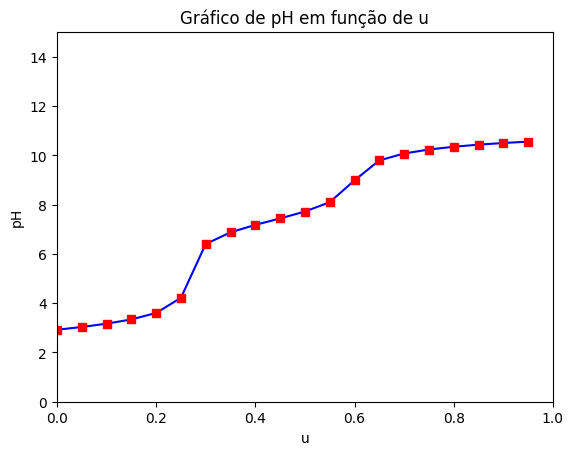

In [ ]:
plt.plot(u, ph, 'b-')
plt.plot(u, ph, 'rs')
plt.ylim(0, 15)
plt.xlim(0, 1)
plt.xlabel('u')
plt.ylabel('pH')
plt.title('Gráfico de pH em função de u')
plt.show()

Ao analisar o gráfico gerado acima, é possível observar como a razão entre as vazões das soluções ácida e alcalina afeta o pH da solução resultante à medida que os valores são incrementados. Sendo esperado que o valor encontrado para o pH, dentro da lógica no laço previamente mostrado, aumente a medida que o u for aumentando. Por fim, para o gráfico obtido, dois pontos principais podem ser destacados:

1.   Não linearidades no processo:
Nos casos em que o processo de neutralização demonstra não linearidades notáveis, como reações químicas não lineares ou mudanças repentinas no comportamento do pH devido a pequenas alterações em u, o gráfico se tornou bem irregular


2.   Transição:
Certas áreas do gráfico, as regiões de transição, apresentam mudanças repentinas no comportamento do pH como resultado de alterações na composição da solução ou na cinética da reação. Estas transições podem explicar as flutuações abruptas no gráfico.


